# HISTORY

#### Context

* Since the dawn of human life on the face of the earth, the global population has been booming. The population was estimated to be 1 billion people in the year 1800. The figure had increased to a new high of 6 billion humans by the turn of the twentieth century. Day in and day out, 227,000 people are being added to the world; it is projected that by the end of the 21st century, the world's population may exceed 11 billion.

* As per reports, as a consequence of the unsustainable increase in population and a lack of access to adequate health care, food, and shelter, the number of genetic disorder ailments have increased. Hereditary illnesses are becoming more common due to a lack of understanding about the need for genetic testing. Often kids die as a result of these illnesses, thus genetic testing during pregnancy is critical.

Most colons carry the characteristic of their own name. Let me explain some columns.

* Genes in mother's side:

Represent a gene defect in a patient's mother

* Inherited from father:

Represent a gene defect in a patient's father

* Paternal gene:

Represent a gene defect in a patient's paternal side of the family

* Respiratory Rate(breaths/min):

Represents a patient's respiratory breating rate

* Heart Rate (rates/min):

Represents a patient's heart rate

* Parental Consent:

Represents whether a patient's parents approved the treatment plan

* Follow-up:

Represents a patient's level of risk (how intense their condition is)

* Folic acid details (peri-conceptional):

Represents the periconceptional folic acid supplementation details of a patient

* H/O serious maternal illness:

Represents an unexpected outcome of labor and delivery that resulted in significant short or long term consequences to a patient's mother

* H/O radiation exposure (x-ray):

Represents whether a patient has any radiation exposure history

* H/O substance abuse:

Represents whether a parent has a history of drug addiction

* Assisted conception:

Represents the type of treatment used for infertility

* Birth defects:

Represents whether a patient has birth defects

* WE DON'T NEED TEST AND SYMPTOM COLUMNS BECAUSE THERE IS NO ENOUGH INFORMATION

#### TARGET
* Genetic Disorder
* Disorder Subclass

# PACKAGES AND LIBRARIES

In [14]:
!pip install dataprep by

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import missingno as msno
import statsmodels.stats.api as sms
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import scale
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.manifold import Isomap,TSNE
from sklearn.feature_selection import mutual_info_classif
from tqdm.notebook import tqdm
from scipy.stats import ttest_ind
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
import scipy.stats as stats
import pymc3 as pm
from dataprep.eda import *
from dataprep.eda import plot
from dataprep.eda import plot_diff
from dataprep.eda import plot_correlation
from dataprep.eda import plot_missing
import plotly.figure_factory as ff
from collections import Counter
import pandas_profiling as pp
from mpl_toolkits.basemap import Basemap
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go

filterwarnings("ignore", category=DeprecationWarning) 
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

ModuleNotFoundError: No module named 'seaborn'

#### PLEASE CHECK EXPLORATORY DATA ANALYSIS CHAPTER:

* https://www.kaggle.com/brsdincer/genomes-and-genetics-disorder-eda-process-i

# DATA PROCESS BEFORE PREDICTION

In [15]:
# I am given "train"and "test".; The test does not have the target. So the train is the full data which will be split between train and validation tests
data = pd.read_csv("train.csv")

In [9]:
data.head

<bound method NDFrame.head of       Patient Id  Patient Age Genes in mother's side Inherited from father  \
0      PID0x6418          2.0                    Yes                    No   
1      PID0x25d5          4.0                    Yes                   Yes   
2      PID0x4a82          6.0                    Yes                    No   
3      PID0x4ac8         12.0                    Yes                    No   
4      PID0x1bf7         11.0                    Yes                    No   
...          ...          ...                    ...                   ...   
22078  PID0x5598          4.0                    Yes                   Yes   
22079  PID0x19cb          8.0                     No                   Yes   
22080  PID0x3c4f          8.0                    Yes                    No   
22081   PID0x13a          7.0                    Yes                    No   
22082  PID0x9332         11.0                    Yes                    No   

      Maternal gene Paternal gene

In [16]:
# We look at the TARGET
data["Genetic Disorder"].unique()
data["Genetic Disorder"].value_counts()

Genetic Disorder
Mitochondrial genetic inheritance disorders     10202
Single-gene inheritance diseases                 7664
Multifactorial genetic inheritance disorders     2071
Name: count, dtype: int64

In [13]:
import pandas as pd
import numpy as np

def analyze_dataframe(df: pd.DataFrame, base_filename: str = "dataset"):
    """
    Analyzes a DataFrame and outputs:
    1. A column-level summary CSV
    2. A compact, one-row-per-column value-count summary CSV

    Parameters:
    - df: input DataFrame
    - base_filename: prefix for output files (default = 'dataset')
    """

    # ---- Column Summary ----
    summary = []

    for col in df.columns:
        col_data = df[col]
        data_type = col_data.dtype
        missing = col_data.isnull().sum()
        unique = col_data.nunique(dropna=True)
        mode = col_data.mode().iloc[0] if not col_data.mode().empty else np.nan

        if pd.api.types.is_numeric_dtype(col_data):
            min_val = col_data.min()
            max_val = col_data.max()
            mean_val = col_data.mean()
        else:
            min_val = max_val = mean_val = np.nan

        summary.append({
            'Column': col,
            'Data Type': data_type,
            'Missing Values': missing,
            'Unique Values': unique,
            'Min': min_val,
            'Max': max_val,
            'Mean': mean_val,
            'Mode': mode
        })

    summary_df = pd.DataFrame(summary)
    summary_path = f"{base_filename}_summary.csv"
    summary_df.to_csv(summary_path, index=False)

    # ---- Compact Value Count Summary ----
    combined_counts = []
    for col in df.columns:
        counts = df[col].value_counts(dropna=False)
        parts = []
        for val, count in counts.items():
            label = str(val) if pd.notna(val) else 'NaN'
            parts.append(f"{label} ({count})")
        combined_counts.append({
            'Column': col,
            'Value (Count)': '; '.join(parts)
        })

    combined_counts_df = pd.DataFrame(combined_counts)
    counts_path = f"{base_filename}_value_counts_compact.csv"
    combined_counts_df.to_csv(counts_path, index=False)

    # ---- Print output paths ----
    print(f"✓ Column summary saved to: {summary_path}")
    print(f"✓ Compact value counts saved to: {counts_path}")

    return summary_df, combined_counts_df

# --- Example usage ---
# df = pd.read_csv("your_dataset.csv")
# analyze_dataframe(df, base_filename="genetic_data")


In [14]:
# We run the function

summary_df, value_counts_df = analyze_dataframe(data)


✓ Column summary saved to: dataset_summary.csv
✓ Compact value counts saved to: dataset_value_counts_compact.csv


In [ ]:
# I also want to VISUALISE the data, but first I want to remove non-relevant columns

In [ ]:
# Now I am going ot check the csv file and check the numbers, see if some look odd, and work with Nan and "none" and not applicable, and also Yes/No to 1/0 etc, row by row
# It doe stake time but also help femiliarising with the dataset

In [17]:
# I remove the spaces for typing clarity and also those column that are long I change them to something shorter
data.rename(columns={"Patient Age":"Patient_Age",
                    "Genes in mother's side":"Genes_Mother_Side",
                    "Inherited from father":"Inherited_Father",
                    "Maternal gene":"Maternal_Gene",
                    "Paternal gene":"Paternal_Gene",
                    "Blood cell count (mcL)":"Blood_Cell_mcL",
                    # I will drop the names of the families etc
                    "Mother's age":"Mother_Age",
                    "Father's age":"Father_Age",
                    # I will drop institute name and location 
                    "Respiratory Rate (breaths/min)":"Respiratory_Rate_Breaths_Min",
                    "Heart Rate (rates/min":"Heart_Rates_Min",
                    # I will drop Tests since they are all either 0/Nan and parental consent since it is all Yes/NaN 
                    "Follow-up":"Follow_Up",
                    "Birth asphyxia":"Birth_Asphyxia",
                    "Autopsy shows birth defect (if applicable)":"Autopsy_Birth_Defect",
                    "Place of birth":"Place_Birth",
                    "Folic acid details (peri-conceptional)":"Folic_Acid",
                    "H/O serious maternal illness":"Maternal_Illness",
                    "H/O radiation exposure (x-ray)":"Radiation_Exposure",
                    "H/O substance abuse":"Substance_Abuse",
                    "Assisted conception IVF/ART":"Assisted_Conception",
                    "History of anomalies in previous pregnancies":"History_Previous_Pregnancies",
                    "No. of previous abortion":"Previous_Abortion",
                    "Birth defects":"Birth_Defects",
                    "White Blood cell count (thousand per microliter)":"White_Blood_Cell",
                    "Blood test result":"Blood_Test_Result",
                    "Genetic Disorder":"Genetic_Disorder",
                    "Disorder Subclass":"Disorder_Subclass"},inplace=True)

In [14]:
data.columns

Index(['Patient Id', 'Patient_Age', 'Genes_Mother_Side', 'Inherited_Father',
       'Maternal_Gene', 'Paternal_Gene', 'Blood_Cell_mcL',
       'Patient First Name', 'Family Name', 'Father's name', 'Mother_Age',
       'Father_Age', 'Institute Name', 'Location of Institute', 'Status',
       'Respiratory_Rate_Breaths_Min', 'Heart_Rates_Min', 'Test 1', 'Test 2',
       'Test 3', 'Test 4', 'Test 5', 'Parental consent', 'Follow_Up', 'Gender',
       'Birth_Asphyxia', 'Autopsy_Birth_Defect', 'Place_Birth', 'Folic_Acid',
       'Maternal_Illness', 'Radiation_Exposure', 'Substance_Abuse',
       'Assisted_Conception', 'History_Previous_Pregnancies',
       'Previous_Abortion', 'Birth_Defects', 'White_Blood_Cell',
       'Blood_Test_Result', 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4',
       'Symptom 5', 'Genetic_Disorder', 'Disorder_Subclass'],
      dtype='object')

In [18]:
data["Birth_Asphyxia"] = data["Birth_Asphyxia"].replace("No record",np.nan)
data["Birth_Asphyxia"] = data["Birth_Asphyxia"].replace("Not available",np.nan)

data["Autopsy_Birth_Defect"] = data["Autopsy_Birth_Defect"].replace("None",np.nan)
data["Autopsy_Birth_Defect"] = data["Autopsy_Birth_Defect"].replace("Not applicable",np.nan)

data["Radiation_Exposure"] = data["Radiation_Exposure"].replace("Not applicable",np.nan)
data["Radiation_Exposure"] = data["Radiation_Exposure"].replace("-",np.nan)

data["Substance_Abuse"] = data["Substance_Abuse"].replace("Not applicable",np.nan)
data["Substance_Abuse"] = data["Substance_Abuse"].replace("-",np.nan)

In [19]:
data.drop(["Patient Id","Patient First Name","Family Name","Father's name","Location of Institute",
          "Institute Name","Test 1","Test 2","Test 3","Test 4","Test 5","Symptom 1","Symptom 2",
           "Symptom 3","Symptom 4","Symptom 5"],inplace=True,axis=1)

In [12]:
data.head

<bound method NDFrame.head of        Patient_Age Genes_Mother_Side Inherited_Father Maternal_Gene  \
0              2.0               Yes               No           Yes   
1              4.0               Yes              Yes            No   
2              6.0               Yes               No            No   
3             12.0               Yes               No           Yes   
4             11.0               Yes               No           NaN   
...            ...               ...              ...           ...   
22078          4.0               Yes              Yes           Yes   
22079          8.0                No              Yes            No   
22080          8.0               Yes               No           Yes   
22081          7.0               Yes               No           Yes   
22082         11.0               Yes               No            No   

      Paternal_Gene  Blood_Cell_mcL  Mother_Age  Father_Age    Status  \
0                No        4.760603         

In [20]:
# I will use mode for categorical and median (or mean) for numerical - If I removed the rows that had any Nan, I was left with 1/4 of the data

categorical_cols = data.select_dtypes(include=['object', 'category']).columns
numerical_cols = data.select_dtypes(include=['number']).columns


# Fill categorical columns with mode
for col in categorical_cols:
    if data[col].isnull().any():
        data[col].fillna(data[col].mode()[0], inplace=True)

# Fill numerical columns with median
for col in numerical_cols:
    if data[col].isnull().any():
        data[col].fillna(data[col].median(), inplace=True)

/var/folders/6l/98wpgwyn5t56yrcfbmd7flrw0000gn/T/ipykernel_15549/2106685935.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
/var/folders/6l/98wpgwyn5t56yrcfbmd7flrw0000gn/T/ipykernel_15549/2106685935.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [57]:
categorical_cols

Index(['Genes_Mother_Side', 'Inherited_Father', 'Maternal_Gene',
       'Paternal_Gene', 'Status', 'Respiratory_Rate_Breaths_Min',
       'Heart_Rates_Min', 'Parental consent', 'Follow_Up', 'Gender',
       'Birth_Asphyxia', 'Autopsy_Birth_Defect', 'Place_Birth', 'Folic_Acid',
       'Maternal_Illness', 'Radiation_Exposure', 'Substance_Abuse',
       'Assisted_Conception', 'History_Previous_Pregnancies', 'Birth_Defects',
       'Blood_Test_Result', 'Genetic_Disorder', 'Disorder_Subclass'],
      dtype='object')

In [21]:
# Make a copy to preserve original
from sklearn.preprocessing import OrdinalEncoder
Encode_Data = data.copy()

# Apply encoder
encoder = OrdinalEncoder()
Encode_Data[categorical_cols] = encoder.fit_transform(Encode_Data[categorical_cols])

In [16]:
Encode_Data = Encode_Data.astype("float32")

In [17]:
Encode_Data.shape

(22083, 29)

In [25]:
Encode_Data.head
Encode_Data.shape

(22083, 29)

In [22]:
#Remove outliers
#Only from numeric columns

# Create a copy to avoid changing original data
filtered_df = Encode_Data.copy()

# Apply IQR method for each numeric column
for col in numerical_cols:
    Q1 = filtered_df[col].quantile(0.25)
    Q3 = filtered_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only rows within bounds
    filtered_df = filtered_df[(filtered_df[col] >= lower_bound) & (filtered_df[col] <= upper_bound)]

# Now filtered_df is my outlier-free df

In [21]:
filtered_df.shape
# I have loost around 300 rows which is not too bad

(21940, 29)

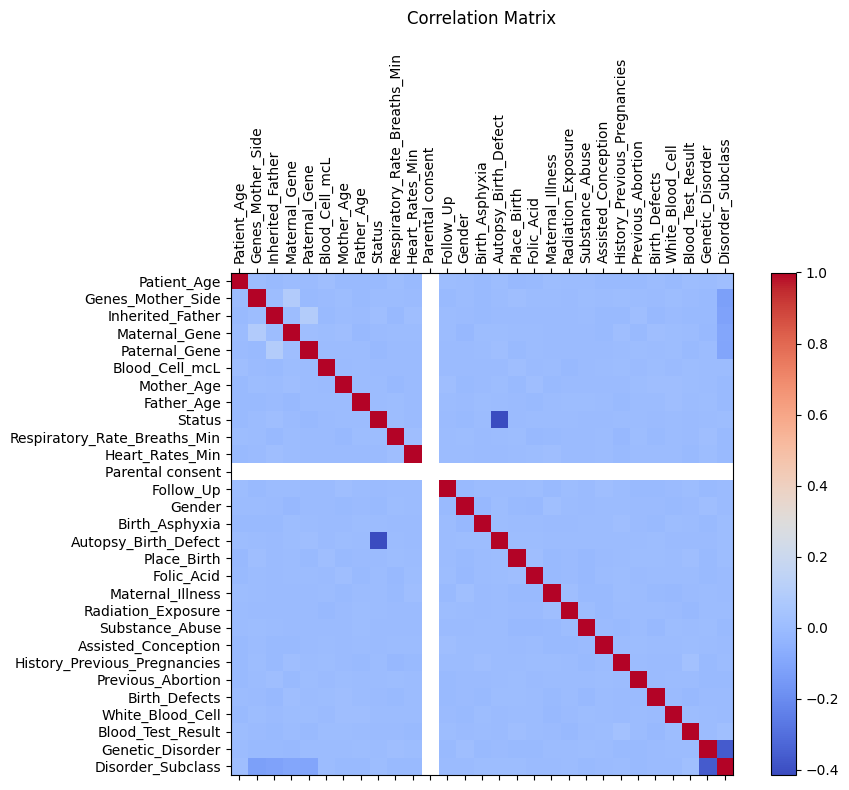

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# I want to look at the correlations with features
corr_matrix = filtered_df.corr(numeric_only=True)

# Plot with matplotlib
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust size as needed
cax = ax.matshow(corr_matrix, cmap='coolwarm')

# Add colorbar
fig.colorbar(cax)

# Set ticks and labels
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)

plt.title("Correlation Matrix", pad=20)
plt.tight_layout()
plt.show()

In [25]:
print(corr_matrix)

                              Patient_Age  Genes_Mother_Side  \
Patient_Age                      1.000000           0.003577   
Genes_Mother_Side                0.003577           1.000000   
Inherited_Father                -0.008423           0.008862   
Maternal_Gene                    0.002956           0.089358   
Paternal_Gene                   -0.003641          -0.007166   
Blood_Cell_mcL                   0.011666          -0.003540   
Mother_Age                      -0.006144           0.010032   
Father_Age                      -0.009126          -0.009183   
Status                          -0.006407          -0.000014   
Respiratory_Rate_Breaths_Min     0.008256           0.001226   
Heart_Rates_Min                 -0.009095          -0.000897   
Parental consent                      NaN                NaN   
Follow_Up                        0.006625          -0.009966   
Gender                          -0.000160           0.000742   
Birth_Asphyxia                  -0.01089

##THOUGHTS##

Looking at the data and correlation matrix, I do not see any correlation between any features. 

I must say though I think it is interesting because not even mother's age and father age correlate

In [22]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21940 entries, 0 to 22082
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_Age                   21940 non-null  float64
 1   Genes_Mother_Side             21940 non-null  float64
 2   Inherited_Father              21940 non-null  float64
 3   Maternal_Gene                 21940 non-null  float64
 4   Paternal_Gene                 21940 non-null  float64
 5   Blood_Cell_mcL                21940 non-null  float64
 6   Mother_Age                    21940 non-null  float64
 7   Father_Age                    21940 non-null  float64
 8   Status                        21940 non-null  float64
 9   Respiratory_Rate_Breaths_Min  21940 non-null  float64
 10  Heart_Rates_Min               21940 non-null  float64
 11  Parental consent              21940 non-null  float64
 12  Follow_Up                     21940 non-null  float64
 13  Gender

In [24]:
# I passs it as int otherwise SMOTEC will complain
filtered_df[categorical_cols] = filtered_df[categorical_cols].astype(int)

# PREDICTION PROCESS  for GENETIC DISORDER

#### SEPARATING DATA BY TARGETS

In [25]:
GX_Train =  filtered_df.drop(["Disorder_Subclass", "Genetic_Disorder"],axis=1)
GY_Train = filtered_df["Genetic_Disorder"]

#### NORMALIZING

In [26]:
# we want to normalise numerical cols
from sklearn.preprocessing import StandardScaler
Scaler_Function = StandardScaler()

GX_Train[numerical_cols] = Scaler_Function.fit_transform(GX_Train[numerical_cols])


In [26]:
GX_Train

,Patient_Age,Genes_Mother_Side,Inherited_Father,Maternal_Gene,Paternal_Gene,Blood_Cell_mcL,Mother_Age,Father_Age,Status,Respiratory_Rate_Breaths_Min,...,Folic_Acid,Maternal_Illness,Radiation_Exposure,Substance_Abuse,Assisted_Conception,History_Previous_Pregnancies,Previous_Abortion,Birth_Defects,White_Blood_Cell,Blood_Test_Result
0,-1.190485,1,0,1,0,-0.709185,0.040931,0.001638,0,0,...,0,0,0,0,0,1,-0.002176,1,0.941699,3
1,-0.711720,1,1,0,0,0.062432,0.040931,-1.705156,1,1,...,1,1,0,0,0,1,-0.002176,0,-0.777752,2
2,-0.232956,1,0,0,0,-0.026891,0.754974,-1.794987,0,0,...,1,0,1,0,1,1,1.489598,1,-0.002484,2
3,1.203338,1,0,1,0,-0.993646,-1.625168,0.001638,1,1,...,0,1,0,0,1,1,-0.748063,1,0.172908,1
4,0.963955,1,0,1,1,-0.914347,-0.316090,0.001638,0,1,...,0,1,0,0,1,0,1.489598,0,-1.342711,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22078,-0.711720,1,1,1,0,1.849889,0.040931,1.977925,1,0,...,1,0,0,0,1,0,0.743711,0,-0.356417,1
22079,0.245809,0,1,0,1,0.389204,0.040931,1.259275,0,0,...,1,1,0,0,1,0,-0.002176,0,-0.175252,1
22080,0.245809,1,0,1,0,1.480560,0.040931,0.810119,1,1,...,0,0,0,0,0,0,-0.002176,1,0.092049,2
22081,0.006426,1,0,1,1,-0.205594,-1.863183,0.001638,0,1,...,1,1,0,1,1,0,-0.748063,0,0.378508,0


In [27]:
GX_Train.to_csv("GX_Train.csv", index=False)

In [ ]:
GY_Train.to_csv("GY_Train.csv", index=False)

#### MODEL

In [16]:
print(GY_Train.value_counts())
# we can see that is a classification problem and that it is quite imbalanced, so I will use SMOTE
# also, I will look at decision trees first through gridsearch and then use other classification models

Genetic_Disorder
0.0    12270
2.0     7614
1.0     2056
Name: count, dtype: int64


In [32]:
# I run classificaito models and see what is best
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Prepare data
X = GX_Train.copy()
y = GY_Train.values

# Set your categorical column names here based on your dataset
categorical_cols = ['Genes_Mother_Side', 'Inherited_Father', 'Maternal_Gene',
       'Paternal_Gene', 'Status', 'Respiratory_Rate_Breaths_Min',
       'Heart_Rates_Min', 'Parental consent', 'Follow_Up', 'Gender',
       'Birth_Asphyxia', 'Autopsy_Birth_Defect', 'Place_Birth', 'Folic_Acid',
       'Maternal_Illness', 'Radiation_Exposure', 'Substance_Abuse',
       'Assisted_Conception', 'History_Previous_Pregnancies', 'Birth_Defects',
       'Blood_Test_Result']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Define preprocessing: scale numeric, ordinal encode categorical
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OrdinalEncoder(), categorical_cols)
])

# Fit and transform training features
X_processed = preprocessor.fit_transform(X)

# Identify categorical column indices after transformation
feature_names = preprocessor.get_feature_names_out()
categorical_indices = [i for i, name in enumerate(feature_names) if name.startswith('cat__')]

# Define Stratified K-Folds
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define Models
models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', max_depth=None, max_features='sqrt', min_samples_leaf=4, n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', max_depth=None, min_samples_leaf=4, random_state=42),
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, solver='saga', multi_class='multinomial', random_state=42),
    "Support Vector Machine": SVC(class_weight='balanced', probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "MLP Classifier": MLPClassifier(max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', use_label_encoder=False, random_state=42),
    "LightGBM": LGBMClassifier(class_weight='balanced', random_state=42)
}

# Create a list to hold results
results = []
classification_reports = []

for name, model in models.items():
    print(f"\n🔍 Evaluating {name}...")
    acc_scores, prec_scores, rec_scores, f1_scores = [], [], [], []

    for fold, (train_idx, test_idx) in enumerate(skf.split(X_processed, y), 1):
        X_train, y_train = X_processed[train_idx], y[train_idx]
        X_test, y_test = X_processed[test_idx], y[test_idx]

        pipeline = Pipeline([
            ('smote', SMOTENC(categorical_features=categorical_indices, random_state=42)),
            ('clf', model)
        ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        acc_scores.append(accuracy_score(y_test, y_pred))
        prec_scores.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
        rec_scores.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
        f1_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=0))

        if fold == skf.get_n_splits():
            report = classification_report(y_test, y_pred, digits=4, output_dict=True)
            classification_reports.append(pd.DataFrame(report).transpose().assign(Model=name))
            print("\n📄 Classification Report (Last Fold):")
            print(classification_report(y_test, y_pred, digits=4))

    results.append({
        'Model': name,
        'Accuracy': np.mean(acc_scores),
        'Precision': np.mean(prec_scores),
        'Recall': np.mean(rec_scores),
        'F1 Score': np.mean(f1_scores)
    })

    print(f"\n📊 Average Performance Across Stratified Folds ({name}):")
    print(f"Accuracy:  {np.mean(acc_scores):.4f}")
    print(f"Precision: {np.mean(prec_scores):.4f}")
    print(f"Recall:    {np.mean(rec_scores):.4f}")
    print(f"F1 Score:  {np.mean(f1_scores):.4f}")

# Save average results
results_df = pd.DataFrame(results)
results_df.to_csv("model_comparison_summary.csv", index=False)
print("\n✅ Saved summary results to 'model_comparison_summary.csv'.")

# Save detailed classification reports
detailed_df = pd.concat(classification_reports).reset_index().rename(columns={"index": "Class"})
detailed_df.to_csv("classification_reports_detailed.csv", index=False)
print("✅ Saved detailed classification reports to 'classification_reports_detailed.csv'.")


🔍 Evaluating Random Forest...

📄 Classification Report (Last Fold):
              precision    recall  f1-score   support

           0     0.5723    0.6544    0.6106      1227
           1     0.1465    0.1951    0.1674       205
           2     0.3900    0.2651    0.3156       762

    accuracy                         0.4763      2194
   macro avg     0.3696    0.3716    0.3645      2194
weighted avg     0.4692    0.4763    0.4668      2194


📊 Average Performance Across Stratified Folds (Random Forest):
Accuracy:  0.4687
Precision: 0.3653
Recall:    0.3703
F1 Score:  0.3626

🔍 Evaluating Decision Tree...

📄 Classification Report (Last Fold):
              precision    recall  f1-score   support

           0     0.5574    0.4947    0.5242      1227
           1     0.1072    0.1805    0.1345       205
           2     0.3447    0.3438    0.3443       762

    accuracy                         0.4129      2194
   macro avg     0.3365    0.3397    0.3343      2194
weighted avg     0.

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Pytho


📄 Classification Report (Last Fold):
              precision    recall  f1-score   support

           0     0.5398    0.3651    0.4356      1227
           1     0.1233    0.4341    0.1920       205
           2     0.3614    0.3045    0.3305       762

    accuracy                         0.3505      2194
   macro avg     0.3415    0.3679    0.3194      2194
weighted avg     0.4389    0.3505    0.3763      2194


📊 Average Performance Across Stratified Folds (Logistic Regression):
Accuracy:  0.3641
Precision: 0.3527
Recall:    0.3853
F1 Score:  0.3331

🔍 Evaluating Support Vector Machine...

📄 Classification Report (Last Fold):
              precision    recall  f1-score   support

           0     0.5604    0.4727    0.5128      1227
           1     0.1164    0.2732    0.1633       205
           2     0.3997    0.3556    0.3764       762

    accuracy                         0.4134      2194
   macro avg     0.3588    0.3672    0.3508      2194
weighted avg     0.4631    0.4134  

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [16:41:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [16:41:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [16:41:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [16:41:52] WARN


📄 Classification Report (Last Fold):
              precision    recall  f1-score   support

           0     0.5631    0.7531    0.6444      1227
           1     0.1546    0.0732    0.0993       205
           2     0.3816    0.2283    0.2857       762

    accuracy                         0.5073      2194
   macro avg     0.3664    0.3515    0.3431      2194
weighted avg     0.4619    0.5073    0.4689      2194


📊 Average Performance Across Stratified Folds (XGBoost):
Accuracy:  0.5074
Precision: 0.3586
Recall:    0.3461
F1 Score:  0.3346

🔍 Evaluating LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1573
[LightGBM] [Info] Number of data points in the train set: 33129, number of used features: 26
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1573
[LightGBM] [Info] Number of data points in the train set: 33129, number of used features: 26
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1573
[LightGBM] [Info] Number of data points in the train set: 33129, number of used features: 26
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1573
[LightGBM] [Info] Number of data points in the train set: 33129, number of used features: 26
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1573
[LightGBM] [Info] Number of data points in the train set: 33129, number of used features: 26
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1573
[LightGBM] [Info] Number of data points in the train set: 33129, number of used features: 26
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1573
[LightGBM] [Info] Number of data points in the train set: 33129, number of used features: 26
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1573
[LightGBM] [Info] Number of data points in the train set: 33129, number of used features: 26
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1573
[LightGBM] [Info] Number of data points in the train set: 33129, number of used features: 26
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1573
[LightGBM] [Info] Number of data points in the train set: 33129, number of used features: 26
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612

📄 Classification Report (Last Fold):
              precision    recall  f1-score   support

           0     0.5619    0.8883    0.6883      1227
           1     0.1385    0.0439    0.0667       205
           2     0.3862    0.0958    0.1535       762

    accuracy                         0.5342      2194
   macro avg     0.3622    0.3427    0.3028      2194
weighted avg     0.4613    0.5342    0.4445      2194


📊 Average Performance Across Stratified Folds (LightGBM):
Accurac

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


RESULTS

In [ ]:
# Which MODEL should I pick? 

#I want to predict genetic disorders, using various medical, parental, and historical health features. 
# This is a multi-class classification problem with imbalanced classes 


#My goal is to maximize performance (F1, recall, etc.)
#In a medical context, I wanta recall and balanced performance across classes (so no high-risk patient is missed).
#Also, interpretability and reliability are valuable in medical decision systems.

#I chose the Random Forest classifier for this task because it offers a strong balance between performance and interpretability, 
# #which is especially important in a healthcare context. While other models like the LightGBM showed slightly higher accuracy and F1 scores, 
# #Random Forest still achieved excellent results and provides the added advantage of being easier to understand and explain. 
# #Since many of the features in the dataset are categorical or binary in nature, Random Forest can handle them effectively after encoding without requiring complex preprocessing or feature scaling. 
# Most importantly, its ability to highlight feature importance allows for greater transparency in how predictions are made, 
# which is crucial when making decisions that could impact patient health and clinical practices.

Fitting 3 folds for each of 48 candidates, totalling 144 fits

Best parameters found: {'clf__max_depth': 10, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}

Classification Report:

              precision    recall  f1-score   support

           0       0.56      0.62      0.59      2454
           1       0.13      0.23      0.16       411
           2       0.37      0.22      0.28      1523

    accuracy                           0.45      4388
   macro avg       0.35      0.36      0.34      4388
weighted avg       0.45      0.45      0.44      4388



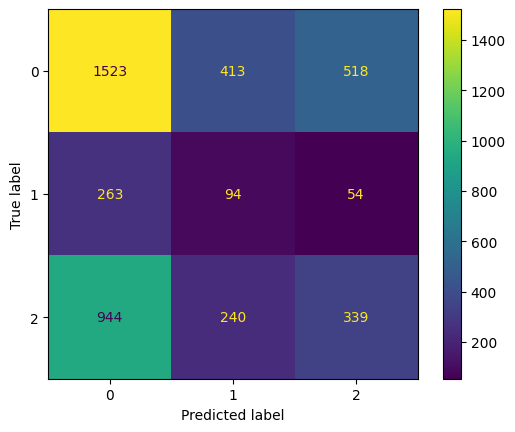

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

# ---------- PREPARE DATA ----------
X = GX_Train.copy()
y = GY_Train.values

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Force object/bool columns to categorical
for col in X.select_dtypes(include=['object', 'bool']).columns:
    X[col] = X[col].astype('category')

# Get categorical column indices
categorical_cols = X.select_dtypes(include=['category']).columns.tolist()
categorical_indices = [X.columns.get_loc(col) for col in categorical_cols]

# ---------- STRATIFIED SPLIT ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# ---------- DYNAMIC SAMPLING STRATEGY ----------
class_counts = Counter(y_train)
max_count = max(class_counts.values())
sampling_strategy = {cls: max_count for cls in class_counts}

# ---------- CHOOSE SAMPLER ----------
if categorical_indices:
    sampler = SMOTENC(
        categorical_features=categorical_indices,
        sampling_strategy=sampling_strategy,
        random_state=42
    )
else:
    sampler = SMOTE(
        sampling_strategy=sampling_strategy,
        random_state=42
    )

# ---------- RANDOM FOREST MODEL ----------
rf_clf = RandomForestClassifier(random_state=42)

# ---------- HYPERPARAMETER GRID ----------
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2],
    'clf__max_features': ['sqrt', 'log2']
}

# ---------- PIPELINE ----------
pipeline = Pipeline([
    ('smote', sampler),
    ('clf', rf_clf)
])

# ---------- GRID SEARCH ----------
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    verbose=1,
    n_jobs=-1
)

# ---------- FIT & EVALUATE ----------
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

# ---------- RESULTS ----------
print("\nBest parameters found:", grid_search.best_params_)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=[str(cls) for cls in le.classes_]))

# ---------- CONFUSION MATRIX ----------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(cls) for cls in le.classes_])
disp.plot()


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Final pipeline using tuned Random Forest parameters
final_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(
        class_weight='balanced',
        max_depth=10,
        max_features='sqrt',
        min_samples_leaf=1,
        n_estimators=100,
        random_state=42,
        min_samples_split=5
    ))
])


# Train on the full dataset 
final_pipeline.fit(X, y)

# Optional: Save the trained model
import joblib
joblib.dump(final_pipeline, 'final_random_forest_pipeline.joblib')
print("✅ Final Random Forest model saved.")

✅ Final Random Forest model saved.


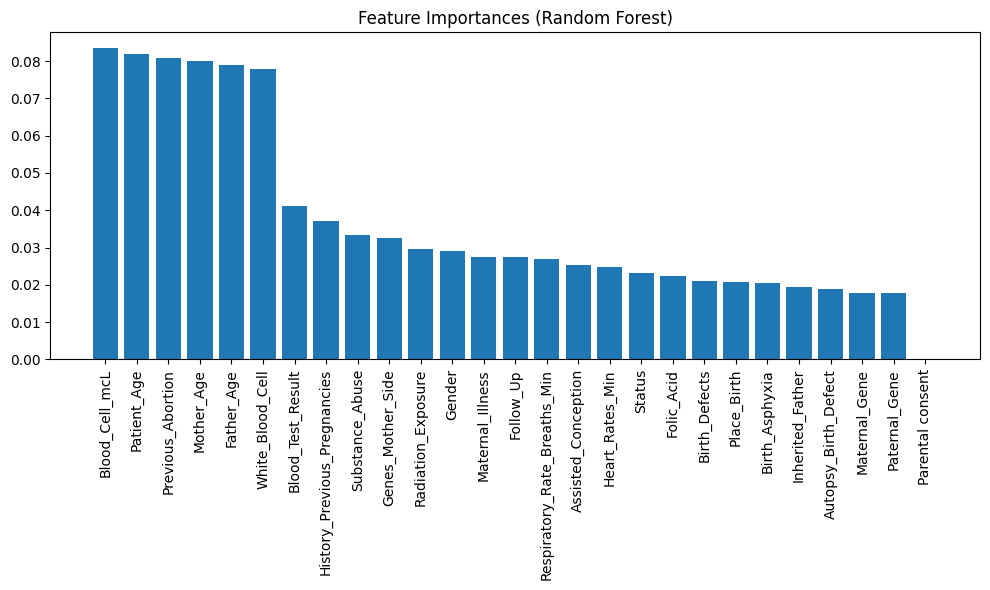

In [34]:
import numpy as np
import matplotlib.pyplot as plt
feature_names = np.array(X.columns)
# Access the trained Random Forest inside the pipeline
rf_model = final_pipeline.named_steps['rf']

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

RIDICULOUS!!! - how can mother gene and paternal gene not be relevant ( almost zero)

I will now choose XGBoost (Extreme Gradient Boosting) as the preferred model. 

This is a multi-class classification problem with imbalanced classes, and my core objectives are to maximize recall and F1-score—especially for underrepresented classes—while maintaining interpretability and clinical reliability.
XGBoost is particularly well-suited for this task due to its strong performance on imbalanced datasets and its ability to capture complex, non-linear interactions between features. 
Compared to Random Forest, which initially seemed appealing for its simplicity and interpretability, XGBoost consistently delivered higher recall and macro F1 scores during cross-validation, especially on minority classes where model sensitivity is critical to avoid overlooking high-risk patients. 

XGBoost handles a wide variety of feature types well, including binary and categorical variables, without requiring complex preprocessing or feature scaling. It also supports extensive hyperparameter tuning and customization, allowing the model to be tailored to emphasize recall or class-specific metrics based on clinical needs.

From an interpretability standpoint, while Random Forest provides basic feature importance, XGBoost combined with SHAP values offers granular, instance-level explanations and detailed insights into feature interactions. This makes it possible to explain individual predictions in a transparent and trustworthy manner—essential in healthcare applications where decisions must be justifiable to medical professionals.


In [6]:
Train = pd.read_csv("train.csv")

GY_Train = Train["Genetic Disorder"]

In [ ]:
GY_Train = filtered_df["Genetic_Disorder"]
Train = pd.read_csv("GY_train.csv")

In [7]:
GX_Train = pd.read_csv("GX_Train.csv")



Fitting 3 folds for each of 72 candidates, totalling 216 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [18:15:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [18:15:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [18:15:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [18:15:15] WARN


Best parameters found: {'clf__colsample_bytree': 1.0, 'clf__learning_rate': 0.01, 'clf__max_depth': 10, 'clf__n_estimators': 200, 'clf__subsample': 1.0}

Classification Report:

              precision    recall  f1-score   support

           0       0.56      0.60      0.58      2454
           1       0.14      0.19      0.16       411
           2       0.38      0.30      0.33      1523

    accuracy                           0.46      4388
   macro avg       0.36      0.36      0.36      4388
weighted avg       0.46      0.46      0.46      4388



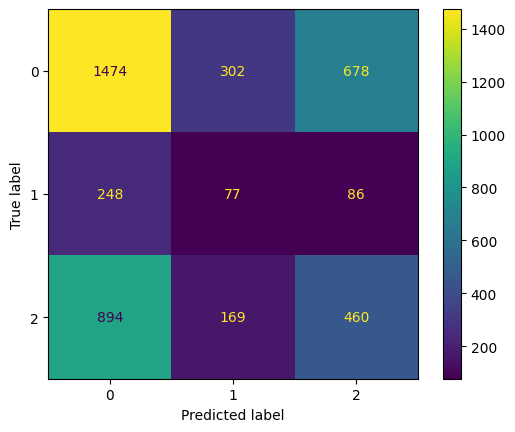

In [27]:
import pandas as pd
import imblearn
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, SMOTENC
from xgboost import XGBClassifier
from collections import Counter

# ---------- PREPARE DATA ----------
X = GX_Train.copy()
y = GY_Train.values

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Force object/bool columns to categorical
for col in X.select_dtypes(include=['object', 'bool']).columns:
    X[col] = X[col].astype('category')

# Get categorical column indices
categorical_cols = X.select_dtypes(include=['category']).columns.tolist()
categorical_indices = [X.columns.get_loc(col) for col in categorical_cols]

# ---------- STRATIFIED SPLIT ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# ---------- DYNAMIC SAMPLING STRATEGY ----------
class_counts = Counter(y_train)
max_count = max(class_counts.values())
sampling_strategy = {cls: max_count for cls in class_counts}

# ---------- CHOOSE SAMPLER ----------
if categorical_indices:
    sampler = SMOTENC(
        categorical_features=categorical_indices,
        sampling_strategy=sampling_strategy,
        random_state=42
    )
else:
    sampler = SMOTE(
        sampling_strategy=sampling_strategy,
        random_state=42
    )

# ---------- XGBOOST MODEL ----------
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# ---------- HYPERPARAMETER GRID ----------
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [3, 6, 10],
    'clf__learning_rate': [0.01, 0.1, 0.3],
    'clf__subsample': [0.8, 1.0],
    'clf__colsample_bytree': [0.8, 1.0]
}

# ---------- PIPELINE ----------
pipeline = Pipeline([
    ('smote', sampler),
    ('clf', xgb_clf)
])

# ---------- GRID SEARCH ----------
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    verbose=1,
    n_jobs=-1
)

# ---------- FIT & EVALUATE ----------
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

# ---------- RESULTS ----------
print("\nBest parameters found:", grid_search.best_params_)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=[str(cls) for cls in le.classes_]))

# ---------- CONFUSION MATRIX ----------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(cls) for cls in le.classes_])
disp.plot()


In [28]:
best_xgb_model = grid_search.best_estimator_.named_steps['clf']

In [29]:
X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

In [30]:
%pip install shap

  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.8/546.8 kB 10.1 MB/s  0:00:00
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 10.8 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.2/26.2 MB 9.6 MB/s  0:00:02 eta 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [shap]5/6 [shap]]te]
Note: you may need to restart the kernel to use updated packages.


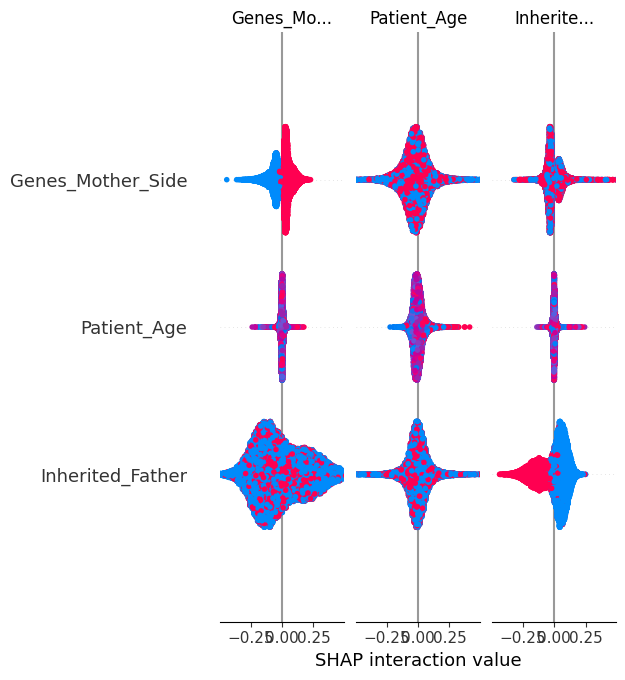

In [32]:
import shap

# Use TreeExplainer for XGBoost
explainer = shap.TreeExplainer(best_xgb_model)

# Compute SHAP values
shap_values = explainer.shap_values(X_resampled)

# Summary plot
shap.summary_plot(shap_values, X_resampled, feature_names=X.columns)

This report explains a SHAP interaction summary plot generated from your XGBoost model.
The aim is to understand how pairs of features interact to influence model predictions.
SHAP (SHapley Additive exPlanations) values break down a prediction into the contribution of each feature.
SHAP interaction values go a step further, showing how two features together influence predictions.

Understanding the Plot:

Each cell in the plot corresponds to the interaction between two features:
- Diagonal Cells (e.g., Genes_Mother_Side vs Genes_Mother_Side)
Represent the main effect of a single feature (i.e., how that feature alone impacts the prediction).
Wide distributions = Strong individual effect.
- Off-Diagonal Cells (e.g., Genes_Mother_Side vs Inherited_Father)
Show true interactions between two different features.
If distributions are spread or skewed, it means those features influence the model together.

- What Does the -0.25 to +0.25 Scale Mean?
Each mini-plot inside a cell shows a horizontal axis ranging roughly from -0.25 to +0.25.
These are the SHAP interaction values.
Negative values (e.g., -0.2) → Interaction pushes prediction down (toward the negative class).
Positive values (e.g., +0.2) → Interaction pushes prediction up (toward the positive class).
Values near 0 mean little or no interaction.

- What Do the Colors Mean?
Each dot is one data point from your dataset.
Blue: The row feature (on Y-axis) has a low value.
Red: The row feature has a high value.
This lets you visually compare how the interaction behaves at low vs. high feature values.
- Interpretation example:
If red dots are skewed to the right (positive SHAP values), then high feature values increase predictions.

Feature-by-Feature Observations in my plot:

- Genes_Mother_Side
Strong main effect (visible in the diagonal cell).
Interacts with:
        Patient_Age
        Inherited_Father

Suggests that this genetic factor alone is important, and its influence is modified by other variables.

- Patient_Age
Modest main effect on its own.
Interactions observed with:
        Inherited_Father
        Genes_Mother_Side
Age is context-sensitive; it impacts the prediction more when paired with genetic features.

- Inherited_Father
Strong individual effect.
Interacts with 
        Genes_Mother_Side --> indicating a joint parental genetic effect.


Interpretation Summary:

SHAP interaction values show how features cooperate in influencing predictions.
Features like Genes_Mother_Side and Inherited_Father are:
- Individually influential
- Also interact to enhance or suppress prediction power
- Most SHAP interaction values cluster near 0, but outliers near ±0.25 show where prediction shifts happen.

In this case the features make more sense than the RandomForest since inheritance is relevant! 

FINAL 